In [60]:
from google.colab import drive
drive.mount("Drive")

Mounted at Drive


In [61]:
import pandas_datareader as web
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [62]:
df = pd.read_excel('/content/Drive/MyDrive/Colab Notebooks/datasets/Crude_price.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jul 01, 2022",106.01,109.34,104.56,108.43,108.43,305338
1,"Jun 30, 2022",109.70,110.45,105.10,105.76,105.76,362890
2,"Jun 29, 2022",111.86,114.05,109.22,109.78,109.78,322060
3,"Jun 28, 2022",110.18,112.22,109.62,111.76,111.76,306748
4,"Jun 27, 2022",107.22,110.54,105.60,109.57,109.57,282914
...,...,...,...,...,...,...,...
1594,"Mar 03, 2016",34.73,35.32,34.19,34.57,34.57,512962
1595,"Mar 02, 2016",33.89,35.17,33.55,34.66,34.66,597834
1596,"Mar 01, 2016",33.90,34.76,33.37,34.40,34.40,566226
1597,"Feb 29, 2016",32.72,33.98,32.32,33.75,33.75,512468


In [63]:
#df = web.DataReader('CL=F', data_source='yahoo', start='2011-01-01' , end='2022-11-19' )
#df

In [64]:
#Get the number of rows and columns in the data set
#df.shape

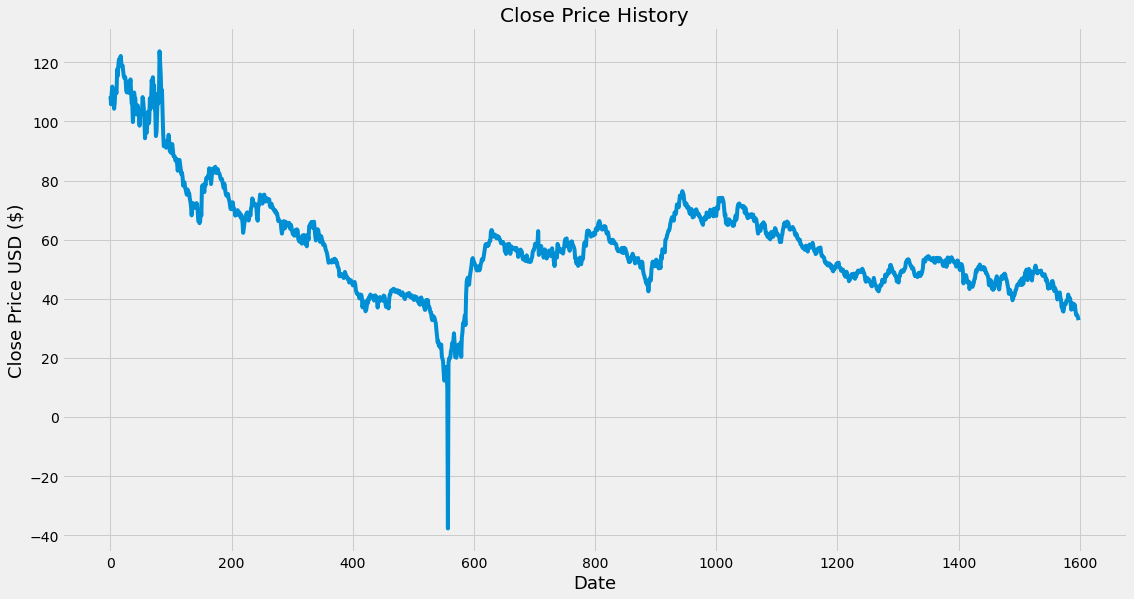

In [65]:
import matplotlib.pyplot as plt
#visualize the closing price history
plt.figure(figsize=(17,9))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [66]:

plt.style.use('fivethirtyeight')
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the numeber of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)
training_data_len


1280

In [67]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.90534928],
       [0.88879936],
       [0.91371723],
       ...,
       [0.44647617],
       [0.44244716],
       [0.43643464]])

In [68]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split te data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(1000, len(train_data)):
  x_train.append(train_data[i-1000:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 1001:
    print(x_train)
    print(y_train)
    print()

[array([0.90534928, 0.88879936, 0.91371723, 0.92599021, 0.91241555,
       0.90032852, 0.87956363, 0.8914647 , 0.9191099 , 0.91675448,
       0.91235356, 0.96212732, 0.94799479, 0.97043327, 0.98283022,
       0.98121862, 0.98642534, 0.99014442, 0.97340854, 0.96776793,
       0.97006136, 0.95766441, 0.94768487, 0.94402777, 0.94650716,
       0.94043265, 0.91712639, 0.91365524, 0.91687845, 0.93510196,
       0.92877952, 0.91253952, 0.92995723, 0.94111449, 0.91811814,
       0.89109279, 0.88848943, 0.8516085 , 0.87224943, 0.91365524,
       0.90429554, 0.90150623, 0.86803446, 0.88514226, 0.88216699,
       0.88631997, 0.86561706, 0.86363355, 0.84404636, 0.86592698,
       0.87658836, 0.87014195, 0.86896423, 0.90398562, 0.89617554,
       0.87943966, 0.85681522, 0.81770285, 0.84231079, 0.82848819,
       0.82972789, 0.86524515, 0.87342714, 0.84857125, 0.85483171,
       0.90156821, 0.87937767, 0.89003905, 0.93925494, 0.92958532,
       0.94563937, 0.92599021, 0.92822166, 0.88222897, 0.8715

In [69]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)


In [70]:
#Reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(280, 1000, 1)

In [71]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [72]:
#Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error' )

In [73]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


280/280 [==============================] - 112s 390ms/step - loss: 0.0042


In [74]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 1000: , : ]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(1000, len(test_data)):
  x_test.append(test_data[i-1000:i, 0])




In [75]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [76]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [77]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


10/10 [==============================] - 3s 189ms/step


In [78]:
#Get the root mean squared error (RMSE)

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse 

4.749399097298649

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


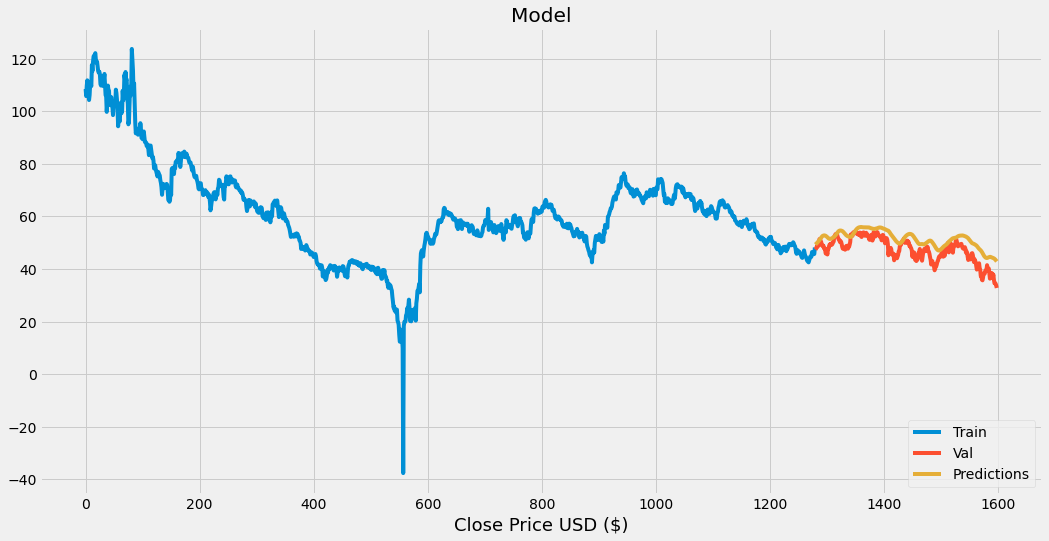

In [79]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.xlabel('Close Price USD ($)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [80]:
#Show the valid and predicted prices
valid

,Close,Predictions
1280,47.40,49.314529
1281,47.66,49.513206
1282,48.36,49.725410
1283,48.32,49.958466
1284,49.66,50.196846
...,...,...
1594,34.57,43.897690
1595,34.66,43.690380
1596,34.40,43.446766
1597,33.75,43.177521


In [81]:
import pickle

In [84]:
pickle.dump(model, open('model_saved.pkl', 'wb'))

In [83]:
model_loaded = pickle.load(open('model_saved.pkl', 'rb'))